# Introduction to SVM



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import scipy.ndimage as ndi
from sklearn.cluster import KMeans, MeanShift 
from sklearn.svm import LinearSVC
import os

np.random.seed(42)

(-0.5, 1199.5, 800.5, -0.5)

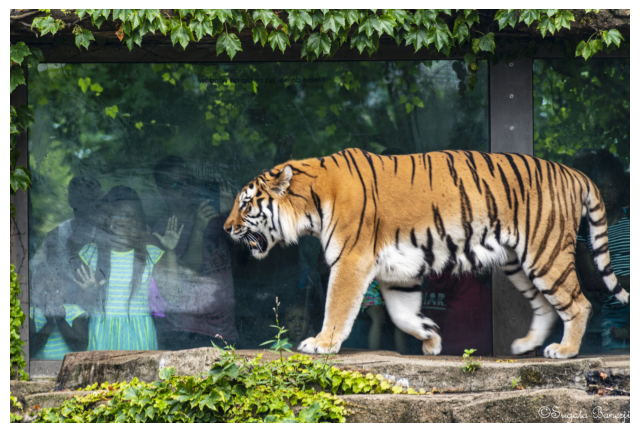

In [3]:
image = io.imread('examples/tiger1.jpg')
fig = plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')

(-0.5, 1199.5, 800.5, -0.5)

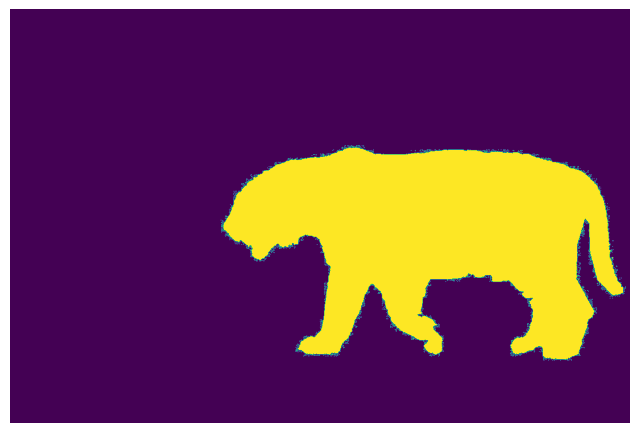

In [4]:
mask = io.imread('examples/tiger1_mask.jpg')
mask = np.int16(mask>0)
fig = plt.figure(figsize=(8, 8))
plt.imshow(mask)
plt.axis('off')

In [21]:
images = range(3,4)

for i in images:
    filename = 'examples/tiger' + str(i) + '.jpg'
    maskname = 'examples/tiger' + str(i) + '_mask.jpg'
    image = io.imread(filename)
    mask = io.imread(maskname)
    mask = np.int16(mask>0)
    pixels = np.reshape(image,[image.shape[0]*image.shape[1],3])
    labels = np.reshape(mask,[mask.shape[0]*mask.shape[1]])

    if i==1:
        train = pixels
        trainlabels = labels
    else:
        train = np.concatenate((train,pixels),axis = 0)
        trainlabels = np.concatenate((trainlabels,labels),axis = 0)

print(train.shape)
print(trainlabels.shape)

(5767200, 3)
(5767200,)


### SVM ###



In [18]:
trainlabels2 = -(1 - trainlabels)
trainlabels = trainlabels + trainlabels2
# Randomizes training data
# idx = np.array(range(trainlabels.shape[0]))
# np.random.shuffle(idx)
# train = train[idx,:]
# trainlabels = trainlabels[idx]
########################
print(train)
print(trainlabels)


[[156 147 142]
 [156 147 142]
 [158 150 147]
 ...
 [103 126  54]
 [103 131  57]
 [120 147  78]]
[-1 -1 -1 ... -1 -1 -1]


In [19]:
model1 = LinearSVC()
model1.fit(pixels,labels)
print(model1)

/Users/banerji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()


/Users/banerji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


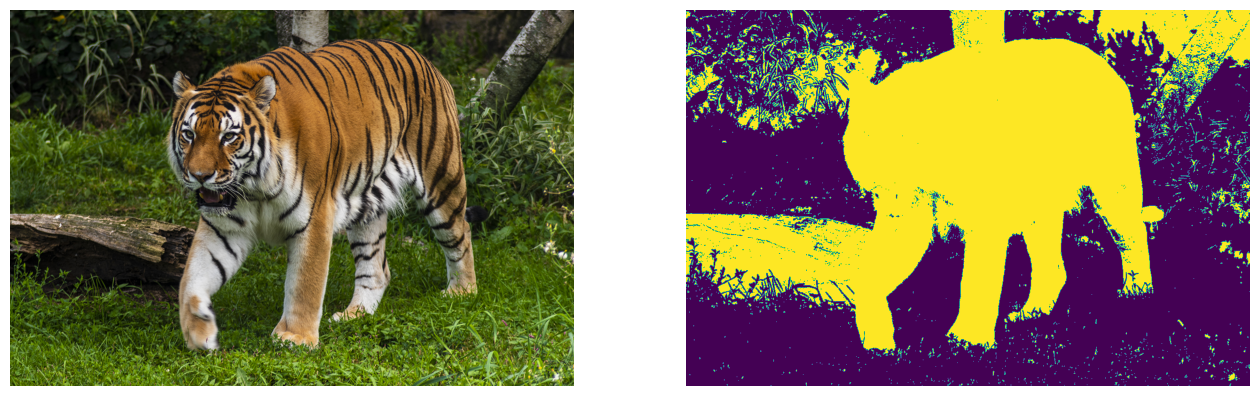

In [20]:
testimage = np.float32(io.imread('examples/tiger.jpg'))

pixels2 = np.reshape(testimage,(testimage.shape[0]*testimage.shape[1],3))

labels2 = model1.predict(pixels2)
newimage = np.reshape(labels2,(testimage.shape[0],testimage.shape[1]))


fig = plt.figure(figsize=(16, 16)) 
ax = fig.add_subplot(1,2,1)
ax.imshow(np.uint8(testimage))
ax.axis('off')
ax = fig.add_subplot(1,2,2)
ax.imshow(newimage)
ax.axis('off')

plt.show()